# pandas数据结构
## 创建Series数据
- Series数据结构类似于一维数组，但它是由一组数据（各种Numpy数据类型）和一组对应的索引组成。通过一组列表数据即可产生最简单的Series数据：

In [33]:
from pandas import Series, DataFrame
import pandas as pd

In [34]:
obj = Series([1, -2, 3, 4])
obj

0    1
1   -2
2    3
3    4
dtype: int64

- Series数据：索引在左边，值在右边。如果没有指定一组数据作为索引的话，Series数据会以0到N-1（N为数据的长度）作为索引，也可以通过指定索引的方式来创建Series数据：

In [35]:
obj2 = Series([1, -2, 3, 4], index=['a', 'b', 'c', 'd'])
obj2

a    1
b   -2
c    3
d    4
dtype: int64

- Series有values和index属性，可返回数据的数组形式和索引对象：

In [36]:
obj2.values

array([ 1, -2,  3,  4], dtype=int64)

In [37]:
obj2.index

Index(['a', 'b', 'c', 'd'], dtype='object')

- Series与普通的一维数组相比，其具有索引对象，可通过索引来获取Series的单个或一组值：

In [38]:
obj2['b']

-2

In [39]:
obj2['c'] = 23
obj2[['c', 'd']]

c    23
d     4
dtype: int64

- Series运算都会保留索引和值之间的链接：

In [40]:
obj2

a     1
b    -2
c    23
d     4
dtype: int64

In [41]:
obj2[obj2 < 0]

b   -2
dtype: int64

In [42]:
obj2 * 2

a     2
b    -4
c    46
d     8
dtype: int64

In [43]:
import numpy as np
np.abs(obj2) # 求绝对值

a     1
b     2
c    23
d     4
dtype: int64

- Series数据中的索引和值一一对应，类似于Python字典数据，所以也可以通过字典数据来创建Series：

In [44]:
data = {
    '张三':92,
    '小明':88,
    '小张':22
}
obj3 = Series(data)
obj3

小张    22
小明    88
张三    92
dtype: int64

- 由于字典结构是无序的，因此这里返回的Series也是无序的，这里依旧可以通过index指定索引的排序顺序：

In [45]:
names = ['张三', '小明', '小张']
obj4 = Series(data, index=names)
obj4

张三    92
小明    88
小张    22
dtype: int64

- Series对象和索引都有name属性，这样我们就可以给Series定义名称，让Series更具可读性：

In [46]:
obj4.name = 'math'
obj4.index.name = 'students'
obj4

students
张三    92
小明    88
小张    22
Name: math, dtype: int64

## 创建DataFrame数据
- DataFrame数据是Python数据分析最常用的数据，无论是创建的数据或外部数据，我们首先想到的都是如何将其转换为DataFrame数据，原因是DataFrame为表格型数据；
- 在Excel中，在单元格中输入数据即可创建一张表格。对于DataFrame数据而言，需要用代码实现，创建DataFrame数据最常用的是传入由数组、列表或元祖组成的字典：


In [47]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
data = {
    'name':['张三', '李四', '王五', '小明'],
    'sex':['female', 'female', 'male', 'male'],
    'year':[2001, 2001, 2003, 2000],
    'city':['Beijing','Shanghai', 'Guangzhou', 'Shanghai']
    }
df = DataFrame(data)
df

,city,name,sex,year
0,Beijing,张三,female,2001
1,Shanghai,李四,female,2001
2,Guangzhou,王五,male,2003
3,Shanghai,小明,male,2000


- DataFrame数据有行索引和列索引，行索引类似于Excel表格中每行的编号（没有指定行索引的情况下），列索引类似于Excel表示的列名（也称字段）
- 由于字典是无序的，因此可以通过columns指定列索引的排序顺序：

In [48]:
df = DataFrame(data, columns=['name', 'sex', 'year', 'city'])
df

,name,sex,year,city
0,张三,female,2001,Beijing
1,李四,female,2001,Shanghai
2,王五,male,2003,Guangzhou
3,小明,male,2000,Shanghai


- 当没有指定行索引的情况下，会使用0到N-1（N为数据的长度）作为行索引，这里也可以使用其他数据作为行索引：

In [49]:
df = DataFrame(data, columns=['name', 'sex', 'year', 'city'],index = ['a', 'b','c', 'd'])
df

,name,sex,year,city
a,张三,female,2001,Beijing
b,李四,female,2001,Shanghai
c,王五,male,2003,Guangzhou
d,小明,male,2000,Shanghai


- 使用嵌套字典的数据也可以创建DataFrame数据：

In [50]:
data2 = {
    'sex':{'张三':'female', '李四':'female', '王五':'male'},
    'city':{'张三':'北京', '李四':'上海', '王五':'广州'}
}
df2 = DataFrame(data2)
df2

,city,sex
张三,北京,female
李四,上海,female
王五,广州,male


- 如果df为某班级学生的信息，通过设置DataFrame的index和columns的name属性，可以将这些信息显示出来：

In [51]:
df.index.name = 'id'
df.columns.name = 'std_info'
df

std_info,name,sex,year,city
id,,,,
a,张三,female,2001,Beijing
b,李四,female,2001,Shanghai
c,王五,male,2003,Guangzhou
d,小明,male,2000,Shanghai


- 通过values属性可以将DataFrame数据转换为二维数组：

In [52]:
df.values

array([['张三', 'female', 2001, 'Beijing'],
       ['李四', 'female', 2001, 'Shanghai'],
       ['王五', 'male', 2003, 'Guangzhou'],
       ['小明', 'male', 2000, 'Shanghai']], dtype=object)

## 索引对象
- Series的索引和DataFrame的行和列索引都是索引对象，用于负责管理轴标签和元数据：

In [53]:
obj2.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [54]:
df.index # 行索引

Index(['a', 'b', 'c', 'd'], dtype='object', name='id')

In [55]:
df.columns # 列索引

Index(['name', 'sex', 'year', 'city'], dtype='object', name='std_info')

- 索引对象是不可以进行修改的：

In [56]:
index = obj.index
index[1] = 'f'

TypeError: Index does not support mutable operations

- 索引对象类似于数组数据，其功能也类似于一个固定大小的集合：

In [57]:
df

std_info,name,sex,year,city
id,,,,
a,张三,female,2001,Beijing
b,李四,female,2001,Shanghai
c,王五,male,2003,Guangzhou
d,小明,male,2000,Shanghai


In [58]:
'sex' in df.columns

True

In [59]:
'f' in df.index

False

## pandas索引操作
### 重新索引
- 重新索引并不是给索引重新命名，而是对索引重新排序，如果某个索引值不存在的话，就会引入缺失值。首先看下Series重新排序后的索引（使用reindex方法）：

|参数|	使用说明|
|--|--|
|index	|用于索引的新序列|
|method	|填充缺失值方法|
|fill_value	|缺失值替代值|
|limit	|最大填充量|

In [60]:
obj = Series([1, -2, 3, -4], index=['b', 'a', 'c', 'd'])
obj

b    1
a   -2
c    3
d   -4
dtype: int64

In [61]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -2.0
b    1.0
c    3.0
d   -4.0
e    NaN
dtype: float64

- 如果需要对插入的缺失值进行填充的话，可通过method参数来实现，参数值为ffill或pad时为向前填充，参数值为bfill或backfill时为向后填充：

In [62]:
obj = Series([1, -2, 3, -4], index=[0, 2, 3, 5])
obj

0    1
2   -2
3    3
5   -4
dtype: int64

In [63]:
obj2 = obj.reindex(range(6), method='ffill')
obj2

0    1
1    1
2   -2
3    3
4    3
5   -4
dtype: int64

- 对于DataFrame数据来说，行和列索引都是可以重新索引的：

In [64]:
df = DataFrame(np.arange(9).reshape(3,3), index=['a', 'c', 'd'], columns=['name', 'id', 'sex'])
df

,name,id,sex
a,0,1,2
c,3,4,5
d,6,7,8


In [65]:
df2 = df.reindex(['a', 'b', 'c', 'd'])
df2

,name,id,sex
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


- 重新索引列需要使用columns关键字：

In [66]:
df3 = df.reindex(columns=['name','year', 'id'], fill_value=0)
df3

,name,year,id
a,0,0,1
c,3,0,4
d,6,0,7


## 更换索引
- 在DataFrame数据中，如果不希望使用默认行索引的话，可在创建的时候通过index参数来设置行索引。有时我们希望将列数据作为行索引，这时可通过set_index方法来实现：

In [67]:
df = DataFrame(data)
df

,city,name,sex,year
0,Beijing,张三,female,2001
1,Shanghai,李四,female,2001
2,Guangzhou,王五,male,2003
3,Shanghai,小明,male,2000


In [68]:
df2 = df.set_index('name')
df2

,city,sex,year
name,,,
张三,Beijing,female,2001
李四,Shanghai,female,2001
王五,Guangzhou,male,2003
小明,Shanghai,male,2000


- 与set_index方法相反的方法是reset_index方法：

In [69]:
df3 = df2.reset_index()
df3

,name,city,sex,year
0,张三,Beijing,female,2001
1,李四,Shanghai,female,2001
2,王五,Guangzhou,male,2003
3,小明,Shanghai,male,2000


- 对于Excel表格而言，排序之后，行索引不会发生改变（依旧是从1开始计数），而对DataFrame数据，排序之后其行索引会改变：

In [70]:
data = {
    'name':['张三', '李四', '王五', '小明'],
    'grade':[68, 78, 63, 92]
}
df = DataFrame(data)
df

,grade,name
0,68,张三
1,78,李四
2,63,王五
3,92,小明


In [71]:
df2 = df.sort_values(by='grade')
df2

,grade,name
2,63,王五
0,68,张三
1,78,李四
3,92,小明


- 使用reset_index可以重排索引：

In [72]:
df3 = df2.reset_index()
df3

,index,grade,name
0,2,63,王五
1,0,68,张三
2,1,78,李四
3,3,92,小明


- 原索引可通过drop参数进行删除：

In [73]:
df4 = df2.reset_index(drop=True)
df4

,grade,name
0,63,王五
1,68,张三
2,78,李四
3,92,小明


## 索引和选取
- Series数据的选取类似于Python的列表：

In [74]:
obj = Series([1, -2, 3, -4],index = ['a', 'b', 'c', 'd'])
obj

a    1
b   -2
c    3
d   -4
dtype: int64

In [75]:
obj[1]

-2

In [76]:
obj['b']

-2

In [77]:
obj[['a', 'c']]

a    1
c    3
dtype: int64

- 在切片运算中，如果是利用索引标签切片，其尾端是被包含的：

In [78]:
obj[0:2]

a    1
b   -2
dtype: int64

In [79]:
obj['a':'c'] # 包含尾端

a    1
b   -2
c    3
dtype: int64

## DataFrame数据的选取：
- 新建数据

In [80]:
data = {
	'name':['张三', '李四', '王五', '小明'],
	'sex':['female', 'female', 'male', 'male'],
	'year':[2001, 2001, 2003, 2000],
	'city':['Beijing','Shanghai', 'Guangzhou', 'Shanghai']
	}
df = DataFrame(data)
df

,city,name,sex,year
0,Beijing,张三,female,2001
1,Shanghai,李四,female,2001
2,Guangzhou,王五,male,2003
3,Shanghai,小明,male,2000


- 通过列索引或以属性的方式可以单独获取DataFrame的列数据，返回的数据为Series结构；
- 选取单独列：

In [81]:
df['city']

0      Beijing
1     Shanghai
2    Guangzhou
3     Shanghai
Name: city, dtype: object

In [82]:
df.name

0    张三
1    李四
2    王五
3    小明
Name: name, dtype: object

- 选取多列：

In [83]:
df[['city', 'sex']]

,city,sex
0,Beijing,female
1,Shanghai,female
2,Guangzhou,male
3,Shanghai,male


PS：选取列不能使用切片，因为切片用于选取行数据。


- 选取行<br/>
	通过行索引标签或行索引位置（0到N-1）的切片形式可选取DataFrame的行数据：


In [84]:
df2 = df.set_index('name')
df2

,city,sex,year
name,,,
张三,Beijing,female,2001
李四,Shanghai,female,2001
王五,Guangzhou,male,2003
小明,Shanghai,male,2000


In [85]:
df2[0:2]

,city,sex,year
name,,,
张三,Beijing,female,2001
李四,Shanghai,female,2001


In [86]:
df2['李四':'王五']

,city,sex,year
name,,,
李四,Shanghai,female,2001
王五,Guangzhou,male,2003


- 如果想获取单独的几行，通过loc和iloc方法可以实现。
- loc方法是按行索引标签选取数据：

In [87]:
df2.loc['张三']

city    Beijing
sex      female
year       2001
Name: 张三, dtype: object

In [88]:
df2.loc[['张三','李四']]

,city,sex,year
name,,,
张三,Beijing,female,2001
李四,Shanghai,female,2001


In [89]:
df2.loc[['张三','李四'], ['sex','city']]

,sex,city
name,,
张三,female,Beijing
李四,female,Shanghai


- iloc方法是按行索引位置选取数据：

In [90]:
df2.iloc[1]

city    Shanghai
sex       female
year        2001
Name: 李四, dtype: object

In [91]:
df2.iloc[[1,3]]

,city,sex,year
name,,,
李四,Shanghai,female,2001
小明,Shanghai,male,2000


In [92]:
df2.iloc[1, 1:]

sex     female
year      2001
Name: 李四, dtype: object

- ix方法可以同时索引标签和索引位置来进行数据的选取：

In [96]:
df2.ix[['张三','王五'], 0:2]

,city,sex
name,,
张三,Beijing,female
王五,Guangzhou,male


In [94]:
df2.ix[:, ['sex', 'year']] # 获取列

,sex,year
name,,
张三,female,2001
李四,female,2001
王五,male,2003
小明,male,2000


In [95]:
df2.ix[[1,3],:] # 获取行

,city,sex,year
name,,,
李四,Shanghai,female,2001
小明,Shanghai,male,2000


- 布尔选择

In [88]:
df2['sex'] == 'female'

name
张三     True
李四     True
王五    False
小明    False
Name: sex, dtype: bool

In [89]:
df2[df2['sex'] == 'female']

,city,sex,year
name,,,
张三,Beijing,female,2001
李四,Shanghai,female,2001


In [91]:
df2[(df2['sex'] == 'female') & (df2['city'] == 'Beijing')]

,city,sex,year
name,,,
张三,Beijing,female,2001


- 操作行和列：
- 增加<br/>
	通过append函数传入字典结构数据：


In [109]:
new_data = {
    'city':'武汉',
    'name':'小李',
    'sex':'male',
    'year':2002
}
df = df.append(new_data, ignore_index=True) # 忽略索引值
df

,city,name,sex,year,class,math
0,Beijing,张三,female,2001,2018.0,92.0
1,Shanghai,李四,female,2001,2018.0,78.0
2,Guangzhou,王五,male,2003,2018.0,58.0
3,Shanghai,小明,male,2000,2018.0,69.0
4,武汉,小李,male,2002,2018.0,82.0
5,武汉,小李,male,2002,NaN,NaN


- 这些学生都是2018级，这里新建一列用于存放该信息。为一个不存在的列赋值，即可创建一个新列：

In [93]:
df['class'] = 2018
df

,city,name,sex,year,class
0,Beijing,张三,female,2001,2018
1,Shanghai,李四,female,2001,2018
2,Guangzhou,王五,male,2003,2018
3,Shanghai,小明,male,2000,2018
4,武汉,小李,male,2002,2018


- 如果新增的列中的数值不一样时，可以传入列表或数组结构数据进行赋值：

In [94]:
df['math'] = [92, 78, 58, 69, 82]
df

,city,name,sex,year,class,math
0,Beijing,张三,female,2001,2018,92
1,Shanghai,李四,female,2001,2018,78
2,Guangzhou,王五,male,2003,2018,58
3,Shanghai,小明,male,2000,2018,69
4,武汉,小李,male,2002,2018,82


- 删除<br/>
	通过drop方法可以删除指定轴上的信息：

In [95]:
new_df = df.drop(2) # 删除行
new_df

,city,name,sex,year,class,math
0,Beijing,张三,female,2001,2018,92
1,Shanghai,李四,female,2001,2018,78
3,Shanghai,小明,male,2000,2018,69
4,武汉,小李,male,2002,2018,82


In [96]:
new_df = new_df.drop('class', axis=1) # 删除列
new_df

,city,name,sex,year,math
0,Beijing,张三,female,2001,92
1,Shanghai,李四,female,2001,78
3,Shanghai,小明,male,2000,69
4,武汉,小李,male,2002,82


- 修改<br/>
	这里的‘改’指的是行和列索引标签的修改，通过rename函数，可完成由于某些原因导致的标签录入错误的问题：

In [97]:
new_df.rename(index={3:2,4:3},columns={'math':'Math'},inplace=True)
# index中把3改成2,4改成3，inplace可在原数据上修改
new_df

,city,name,sex,year,Math
0,Beijing,张三,female,2001,92
1,Shanghai,李四,female,2001,78
2,Shanghai,小明,male,2000,69
3,武汉,小李,male,2002,82


## 算术运算
- pandas的数据对象在进行算术运算时，如果有相同索引对则进行算术运算，如果没有则会引入缺失值，这就是数据对齐。
- Series数据的算术运算：

In [98]:
obj1 = Series([3.2, 5.3, -4.4, -3.7], index=['a','c','g','f'])
obj1

a    3.2
c    5.3
g   -4.4
f   -3.7
dtype: float64

In [99]:
obj2 = Series([5.0, -2, 4.4, 3.5], index=['a','b','c','d'])
obj2

a    5.0
b   -2.0
c    4.4
d    3.5
dtype: float64

In [100]:
obj1 + obj2

a    8.2
b    NaN
c    9.7
d    NaN
f    NaN
g    NaN
dtype: float64

- 对于DataFrame数据，对齐操作会同时发生在行和列上：

In [101]:
df1 = DataFrame(np.arange(9).reshape(3,3),columns=['a','b','c'],index=['apple','tea','banana'])
df1

,a,b,c
apple,0,1,2
tea,3,4,5
banana,6,7,8


In [102]:
df2 = DataFrame(np.arange(9).reshape(3,3),columns=['a','b','d'],index=['apple','tea','coco'])
df2

,a,b,d
apple,0,1,2
tea,3,4,5
coco,6,7,8


In [103]:
df1 + df2

,a,b,c,d
apple,0.0,2.0,NaN,NaN
banana,NaN,NaN,NaN,NaN
coco,NaN,NaN,NaN,NaN
tea,6.0,8.0,NaN,NaN


- 如果是DataFrame和Series数据在进行运算时，先通过Series的索引匹配到相应的DataFrame列索引上，然后沿行向下运算（广播）：

In [104]:
df1

,a,b,c
apple,0,1,2
tea,3,4,5
banana,6,7,8


In [106]:
s = df1.ix['apple']
s

a    0
b    1
c    2
Name: apple, dtype: int32

In [107]:
df1 - s

,a,b,c
apple,0,0,0
tea,3,3,3
banana,6,6,6


## 函数应用与映射
- 在数据分析实战中，常常会对数据进行较复杂的数据运算，这时需要定义函数。定义好的函数可以应用到pandas数据中，其中有三种方法：
- map函数，将函数套用在Series的每个元素中；
- apply函数，将函数套用到DataFrame的行与列上；
- applymap函数，将函数套用到DataFrame的每个元素上

————————————————————并不华丽的分割连————————————————————
- 需要把price列的“元”字去掉，这时就需要用到map函数：

In [97]:
data = {
    'fruit':['apple', 'orange', 'grape', 'banana'],
    'price':['25元', '42元', '35元', '14元']
}
df1 = DataFrame(data)
df1

,fruit,price
0,apple,25元
1,orange,42元
2,grape,35元
3,banana,14元


In [112]:
def f(x):
    return x.split('元')[0]
df1['price'] = df1['price'].map(f)
df1

,fruit,price
0,apple,25
1,orange,42
2,grape,35
3,banana,14


- apply函数的使用：

In [113]:
df2 = DataFrame(np.random.randn(3,3),columns=['a','b','c'],index=['app','win','mac'])
df2

,a,b,c
app,0.986164,1.067039,1.665641
win,-0.387928,-0.159826,-0.350079
mac,-0.479963,-0.532185,1.045350


In [114]:
f = lambda x:x.max()-x.min()
df2.apply(f)

a    1.466127
b    1.599224
c    2.015720
dtype: float64

- applymap函数可作用于每个元素，便于对整个DataFrame数据进行批量处理：

In [115]:
df2

,a,b,c
app,0.986164,1.067039,1.665641
win,-0.387928,-0.159826,-0.350079
mac,-0.479963,-0.532185,1.045350


In [116]:
df2.applymap(lambda x:'%.2f'%x)

,a,b,c
app,0.99,1.07,1.67
win,-0.39,-0.16,-0.35
mac,-0.48,-0.53,1.05


## 排序
- 在Series中，通过sort_index函数可对索引进行排序，默认为升序：

In [117]:
obj1 = Series([-2,3,2,1],index=['b','a','d','c'])
obj1

b   -2
a    3
d    2
c    1
dtype: int64

In [118]:
obj1.sort_index() # 升序

a    3
b   -2
c    1
d    2
dtype: int64

In [119]:
obj1.sort_index(ascending=False) # 降序

d    2
c    1
b   -2
a    3
dtype: int64

- 通过sort_values方法可对值进行排序：

In [120]:
obj1.sort_values()

b   -2
c    1
d    2
a    3
dtype: int64

- 对于DataFrame数据，通过指定轴方向，使用sort_index函数可对行或者列索引进行排序。要根据列进行排序，可以通过sort_values函数，把列名传给by参数：

In [121]:
df2

,a,b,c
app,0.986164,1.067039,1.665641
win,-0.387928,-0.159826,-0.350079
mac,-0.479963,-0.532185,1.045350


In [122]:
df2.sort_values(by='b')

,a,b,c
mac,-0.479963,-0.532185,1.045350
win,-0.387928,-0.159826,-0.350079
app,0.986164,1.067039,1.665641


## 汇总与统计
- 通过sum函数进行求和汇总：

In [123]:
df = DataFrame(np.random.randn(9).reshape(3,3),columns=['a','b','c'])
df

,a,b,c
0,-0.422465,-0.572246,-0.005149
1,0.405784,1.093608,0.243468
2,1.053188,-0.169777,1.090045


In [124]:
df.sum() # 按列求和

a    1.036507
b    0.351586
c    1.328364
dtype: float64

In [125]:
df.sum(1) # 按行求和
# df.sum(axis=1)

0   -0.999859
1    1.742859
2    1.973457
dtype: float64

In [128]:
data = {
	'name':['张三', '李四', '王五', '小明'],
	'sex':['female', 'female', 'male', 'male'],
	'math':[78, 79, 83, 92],
	'city':['Beijing','Shanghai', 'Guangzhou', 'Shanghai']
	}
df = DataFrame(data)
df

,city,math,name,sex
0,Beijing,78,张三,female
1,Shanghai,79,李四,female
2,Guangzhou,83,王五,male
3,Shanghai,92,小明,male


- describe方法可对每个数值型列进行统计，经常用于对数据的初步观察

In [129]:
df.describe()

,math
count,4.000000
mean,83.000000
std,6.377042
min,78.000000
25%,78.750000
50%,81.000000
75%,85.250000
max,92.000000


## 唯一值与值计数
- 通过unique函数获取不重复的数组

In [130]:
obj = Series(['a','b','a','a','c'])
obj

0    a
1    b
2    a
3    a
4    c
dtype: object

In [131]:
obj.unique()

array(['a', 'b', 'c'], dtype=object)

- 通过value_counts方法统计每个值出现的次数：

In [132]:
obj.value_counts()

a    3
c    1
b    1
dtype: int64

## 层次化索引
- 简介：<br/>
	简单地说，层次化索引就是轴上有多个级别索引，如创建一个层次化索引的Series对象：

In [98]:
obj = Series(np.random.randn(9),
            index=[['one','one','one','two','two','two','three','three','three'],
                  ['a','b','c','a','b','c','a','b','c']])
obj

one    a   -1.239103
       b    0.547168
       c   -1.040569
two    a   -0.968881
       b    1.101659
       c    0.961864
three  a    0.038905
       b   -1.878870
       c   -1.451909
dtype: float64

- 该索引对象为MultiIndex对象：

In [99]:
obj.index

MultiIndex(levels=[['one', 'three', 'two'], ['a', 'b', 'c']],
           labels=[[0, 0, 0, 2, 2, 2, 1, 1, 1], [0, 1, 2, 0, 1, 2, 0, 1, 2]])

- 层次化索引的对象，索引和选取操作都很简单：

In [100]:
obj['two']

a   -0.968881
b    1.101659
c    0.961864
dtype: float64

In [101]:
obj[:, 'a']  # 内层选取

one     -1.239103
two     -0.968881
three    0.038905
dtype: float64

- 对于DataFrame数据而言，行和列索引都可以为层次化索引：

In [102]:
df = DataFrame(np.arange(16).reshape(4,4),
              index=[['one','one','two','two'],['a','b','a','b']],
              columns=[['apple','apple','orange','orange'],['red','green','red','green']])
df

apple       orange      
        red green    red green
one a     0     1      2     3
    b     4     5      6     7
two a     8     9     10    11
    b    12    13     14    15

In [103]:
df['apple']

red  green
one a    0      1
    b    4      5
two a    8      9
    b   12     13

## 重拍分级排序
- 通过swaplevel方法可以对层次化索引进行重排：

In [104]:
df.swaplevel()

apple       orange      
        red green    red green
a one     0     1      2     3
b one     4     5      6     7
a two     8     9     10    11
b two    12    13     14    15

- 汇总统计

In [105]:
df.sum(level=0)

apple       orange      
      red green    red green
one     4     6      8    10
two    20    22     24    26

In [107]:
df.sum(level=1, axis=1)

red  green
one a    2      4
    b   10     12
two a   18     20
    b   26     28

## pandas可视化
- 线形图<br/>
	pandas库中的Series和DataFrame中都有绘制各类图表的plot方法，默认情况绘制的是线形图。先创建一个Series对象：

In [1]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt # 导入matplotib库
%matplotlib inline
# %matplotlib inline为魔法函数，使用该函数绘制的图片会直接显示在Notebook中
s = Series(np.random.normal(size=10))
s

0    0.478395
1   -1.955261
2    1.370055
3   -1.334659
4    0.556710
5    1.282353
6    0.182990
7    0.570575
8    0.723553
9    1.490062
dtype: float64

- 通过s.plot方法可以绘制线形图，Series的索引作为X轴，值为Y轴：

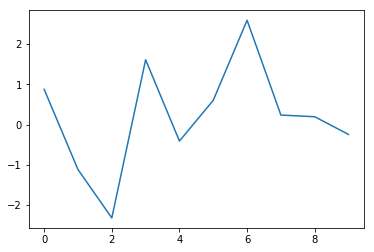

In [134]:
s.plot()

- 通过DataFrame数据的plot方法可以为各列绘制一条线，并会给其创建好图例。

In [6]:
df = DataFrame({'normal':np.random.normal(size=100),  # 正态分布
               'gamma':np.random.gamma(1, size=100),  # 伽马分布
               'poisson':np.random.poisson(size=100)})# 泊松分布
df.cumsum() # 累积和

,gamma,normal,poisson
0,2.729507,1.160675,2.0
1,3.135381,1.748584,2.0
2,4.411251,1.349974,2.0
3,4.610472,1.777132,5.0
4,5.675070,1.627228,5.0
5,5.853412,2.397622,7.0
6,6.093918,2.294081,7.0
7,13.143190,1.938108,7.0
8,13.965185,1.675896,8.0
9,15.284506,2.670290,9.0


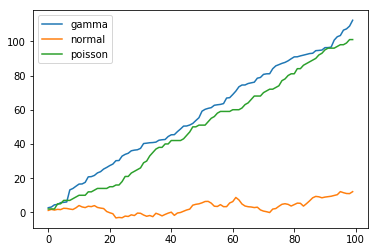

In [9]:
df.cumsum().plot()

## 柱状图
- 柱状图常描绘各类别之间的关系。例如，班级中男生和女生的分布情况；某零售店各商品的购买数量分布情况。通过pandas绘制柱状图，只需要在plot函数中加入kind=’bar’，如果类别较多，可绘制水平柱状图（kind=’barh’）。
- 创建一个DataFrame数据的学生信息表格，分析班级的男女比例是否平衡，通过value_counts计数，获取男女计数的Series数据，进而绘制柱状图：


In [10]:
data = {
    'name':['张三','李四','王五','小明','Peter'],
    'sex':['female','female','male','male','male'],
    'year':[2001, 2001, 2003, 2002, 2002],
    'city':['北京','上海','广州','北京','北京']
}
df = DataFrame(data)
df

,city,name,sex,year
0,北京,张三,female,2001
1,上海,李四,female,2001
2,广州,王五,male,2003
3,北京,小明,male,2002
4,北京,Peter,male,2002


In [11]:
df['sex'].value_counts()

male      3
female    2
Name: sex, dtype: int64

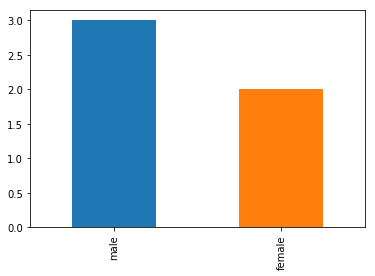

In [12]:
df['sex'].value_counts().plot(kind='bar')

- 对于DataFrame数据而言，每一行的值会成为一组：

In [13]:
df2 = DataFrame(np.random.randint(0, 100, size=(3,3)),
               index=('one','two','three'),
               columns=['A','B','C'])
df2

,A,B,C
one,96,69,8
two,33,18,97
three,70,88,45


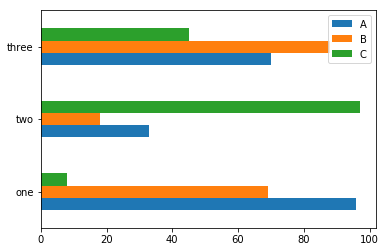

In [15]:
df2.plot(kind='barh')

- 设置plot函数的stacked参数为True，可以绘制堆积柱状图：

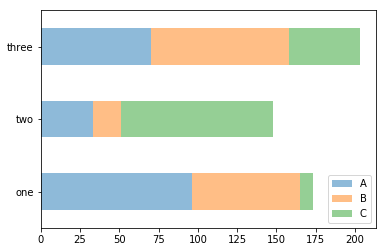

In [16]:
df2.plot(kind='barh',stacked=True,alpha=0.5) # alpha设置颜色透明度

## 直方图和密度图
- 直方图用于频率分布，y轴可为数值或者比率。直方图在统计分析中经常使用。绘制数据的直方图，可以看出其大概分布规律。例如，某班级的身高情况一般是服从正态分布，即高个子和矮个子的人较少，大部分都是在平均身高左右。
- 可以通过hist方法绘制直方图：

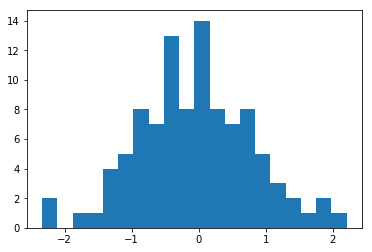

In [25]:
s = Series(np.random.normal(size=100))
s.hist(bins=20,grid=False) 
# grid参数添加网格，默认True
# bins参数是将值分为多少段，默认10

- 核密度估计（KDE）是对真实密度的估计，其过程是将数据的分布近似为一组核（如正态分布）。通过plot函数的kind=’kde’可进行绘制：

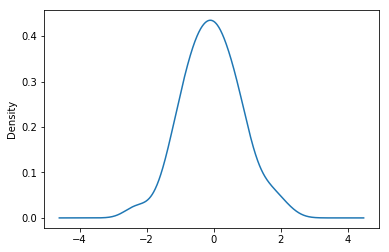

In [26]:
s.plot(kind='kde')

## 散点图
- 散点图主要用来表现数据之间的规律。例如，身高和体重之间的规律。

In [27]:
df3 = DataFrame(np.arange(10),columns=['X'])
df3['Y'] = 2 * df3['X'] + 5
df3

,X,Y
0,0,5
1,1,7
2,2,9
3,3,11
4,4,13
5,5,15
6,6,17
7,7,19
8,8,21
9,9,23


- 通过设置plot函数的kind=’scatter’,x=’X’, y=’Y’绘制散点图：

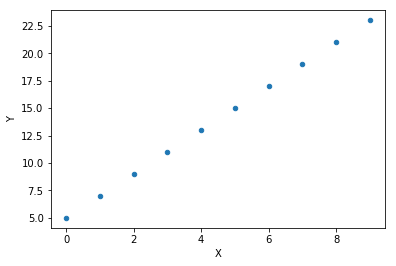

In [28]:
df3.plot(kind='scatter',x='X',y='Y')